In [1]:
# 导入包

import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score 

In [2]:
# 导入数据集

df = pd.read_csv('Consumer_Complaints.csv',
                 engine='python',
                 error_bad_lines=False,
                 warn_bad_lines=False,
                parse_dates=['Date received','Date sent to company'])

In [3]:
# 查看数据集
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279961 entries, 0 to 279960
Data columns (total 18 columns):
Date received                   279961 non-null datetime64[ns]
Product                         279961 non-null object
Sub-product                     223388 non-null object
Issue                           279961 non-null object
Sub-issue                       155484 non-null object
Consumer complaint narrative    52073 non-null object
Company public response         86615 non-null object
Company                         279961 non-null object
State                           275402 non-null object
ZIP code                        262440 non-null object
Tags                            36682 non-null object
Consumer consent provided?      119356 non-null object
Submitted via                   279961 non-null object
Date sent to company            279961 non-null datetime64[ns]
Company response to consumer    279960 non-null object
Timely response?                279961 non-null obj

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-03-12,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,2014-03-17,Closed with explanation,Yes,No,759217
1,2017-01-19,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,2017-01-19,Closed with explanation,Yes,No,2296496
2,2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,2018-04-06,Closed with explanation,Yes,NaN,2866101
3,2014-06-08,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,2014-06-10,Closed with explanation,Yes,Yes,885638
4,2014-09-13,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,2014-09-13,Closed with explanation,Yes,Yes,1027760


In [4]:
# 数据评估

## 1.Date received / Date sent to company 数据类型不正确，object——>datetime(导入数据时已解决)
## 2.State/ ZIP code / Tags / Submitted via 等变量数据类型不正确，object——>category(后面建模时统一处理)

In [5]:
## 3.Product 分类描述有重复
print(df['Product'].unique())

df[df['Product']=='Money transfer, virtual currency, or money service']['Sub-product'].unique()

df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']['Sub-product'].unique()

df[df['Product']=='Payday loan, title loan, or personal loan']['Sub-product'].unique()

['Mortgage' 'Student loan' 'Credit card or prepaid card' 'Credit card'
 'Debt collection' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Bank account or service' 'Consumer Loan' 'Money transfers'
 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service'
 'Checking or savings account' 'Payday loan'
 'Payday loan, title loan, or personal loan' 'Other financial service'
 'Prepaid card' 'Virtual currency']


array(['Personal line of credit', 'Payday loan', 'Installment loan',
       'Title loan', 'Pawn loan'], dtype=object)

In [6]:
## 4.Issue 分类描述有重复
df['Issue'].unique()

array(['Loan modification,collection,foreclosure',
       'Dealing with my lender or servicer',
       'Other features, terms, or problems', 'Bankruptcy',
       'Communication tactics',
       'Loan servicing, payments, escrow account',
       'Improper contact or sharing of info',
       'Trouble during payment process', 'Repaying your loan',
       'Incorrect information on credit report',
       'Credit decision / Underwriting',
       "Credit reporting company's investigation",
       'Incorrect information on your report',
       'Application, originator, mortgage broker',
       "Cont'd attempts collect debt not owed",
       'Making/receiving payments, sending money',
       'Improper use of your report',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Delinquent account', 'Account opening, closing, or management',
       'Attempts to collect debt not owed', 'Deposits and withdrawals',
       'False statements or representation

In [7]:
# 数据清洗
df_clean = df.copy()

In [8]:
## 3.解决Product分类描述重复问题

### 将Product=='Credit card'换成'Credit card/Prepaid card',其对应的'Sub-product'换成'Credit card'
df_clean.loc[df_clean['Product']=='Credit card','Sub-product'] = 'Credit card'
df_clean['Product'].replace('Credit card','Credit card/Prepaid card',inplace=True)

### 将Product=='Prepaid card'换成'Credit card/Prepaid card'
df_clean['Product'].replace('Prepaid card','Credit card/Prepaid card',inplace=True)

### 将Product=='Credit card or prepaid card'换成'Credit card/Prepaid card'
df_clean['Product'].replace('Credit card or prepaid card','Credit card/Prepaid card',inplace=True)

In [9]:
### Product是'Money transfers'、'Virtual currency'和'Money transfer, virtual currency, or money service'可以细化产品分类      
df_clean.loc[df['Sub-product'] =='Domestic (US) money transfer','Product']='Money transfers'
df_clean.loc[df['Sub-product']=='International money transfer','Product']='Money transfers'

df_clean.loc[df['Sub-product'] =='Virtual currency','Product']='Virtual currency'
df_clean.loc[df['Sub-product'] =='Mobile or digital wallet','Product']='Virtual currency'

df_clean['Product'].replace('Money transfer, virtual currency, or money service',
                            'Other financial service',
                            inplace=True)

In [10]:
### 将Product=='Credit reporting, credit repair services, or other personal consumer reports'换成'Credit reporting'
### 因为Sub-product中’credit repair services‘和‘other personal consumer reports’总计不到800，所以均计入产品'Credit reporting‘
df_clean['Product'].replace('Credit reporting, credit repair services, or other personal consumer reports',
                            'Credit reporting',
                            inplace=True)

In [11]:
### 将product中的'Payday loan, title loan, or personal loan'分解为
### 'Personal line of credit'，'Payday loan'，'Installment loan'，'Title loan'，'Pawn loan'
### 除'Payday loan'归类到'Payday loan'产品，其它均归类到‘Consumer Loan’产品
product1 = 'Payday loan, title loan, or personal loan'        
df_clean.loc[(df_clean['Product']== product1) & (df_clean['Sub-product']== 'Payday loan'),'Product'] = 'Payday loan'
df_clean.loc[df_clean['Product']== product1 ,'Product'] = 'Consumer loan'

In [12]:
# 符号替换

df_clean['Product'].replace('Bank account or service','Bank account/service',inplace=True)
df_clean['Product'].replace('Vehicle loan or lease','Vehicle loan/lease',inplace=True)                            
df_clean['Product'].replace('Checking or savings account','Checking/Savings account',inplace=True)                             

In [13]:
# 测试（最终产品确定为14类）
df_clean['Product'].unique()

array(['Mortgage', 'Student loan', 'Credit card/Prepaid card',
       'Debt collection', 'Credit reporting', 'Bank account/service',
       'Consumer Loan', 'Money transfers', 'Vehicle loan/lease',
       'Checking/Savings account', 'Payday loan', 'Consumer loan',
       'Other financial service', 'Virtual currency'], dtype=object)

In [14]:
# 4.解决Product分类描述重复问题，尽量减少分类数量，合并描述近似的分类

issue_similar_items = [['Incorrect information on credit report','Incorrect information on your report'],
                       ["Problem with a credit reporting company's investigation into an existing problem",
                        "Credit reporting company's investigation", 
                        "Problem with a company's investigation into an existing issue"],
                      ['Managing, opening, or closing account', 'Account opening, closing, or management',
                      'Managing, opening, or closing your mobile wallet account', 'Closing/Cancelling account',
                       'Closing your account', 'Managing an account','Closing an account'],
                      ['Unexpected or other fees','Other fee','Unexpected/Other fees'],
                      ['Took or threatened to take negative or legal action', 'Taking/threatening an illegal action'],
                      ['Improper use of credit report', 'Improper use of your report', 'Improper use of my credit report'],
                      [ 'Trouble during payment process',' Problem when making payments'],
                      ['Struggling to pay the loan','Struggling to pay mortgage','Struggling to repay your loan',
                      'Struggling to pay your loan','Struggling to pay your bill'],
                      [ 'Problems caused by the funds being low','Problems caused by my funds being low',
                      'Problem caused by your funds being low'],
                      ['Dealing with the lender or servicer','Dealing with my lender or servicer',
                      'Dealing with your lender or servicer'],
                      ['Other transaction issues', 'Unauthorized transactions or other transaction problem',
                      'Unauthorized transactions/trans. issues','Other transaction problem','Transaction issue'],
                      ['Unable to get credit report/credit score','Unable to get your credit report or credit score'],
                      ['Other service problem','Other service issues'],
                      ['Problems when you are unable to pay',"Can't repay my loan"],
                      ["Charged fees or interest that didn't expect","Charged fees or interest I didn't expect",
                       "Charged fees or interest you didn't expect"],
                      ['Getting a loan or lease','Getting a loan','Getting the loan'],
                      ['Customer service/Customer relations','Customer service / Customer relations',
                      'Problem with customer service'],
                      ['Credit monitoring or identity theft protection services','Credit monitoring or identity protection',
                       'Identity theft protection or other monitoring services'],
                      ['Trouble using your card','Trouble using the card'],
                      ['Advertising and marketing','Advertising and marketing, including promotional offers','Advertising',
                      'Advertising, marketing or disclosures','Confusing or misleading advertising or marketing'],
                      ['Cash advance','Cash advance fee','Problem with cash advance'],
                      [ 'Balance transfer','Balance transfer fee'],
                      ["Received a loan that didn't apply for","Received a loan I didn't apply for",
                      "Received a loan you didn't apply for"],
                      ['Vehicle was repossessed or sold the vehicle','Lender repossessed or sold the vehicle'],
                      ["Can't contact lender or servicer","Can't contact lender"],
                      ["Was approved for a loan, but didn't receive money",
                       "Was approved for a loan, but didn't receive the money"],
                      ['Overdraft, savings or rewards features','Overdraft, savings, or rewards features'],
                      ['Adding money','Problem adding money'],
                      ['Charged bank acct wrong day or amt',
                       'Money was taken from your bank account on the wrong day or for the wrong amount']]


for items in issue_similar_items:
    df_clean['Issue'].replace([x for x in items],items[0],inplace=True)

In [15]:
# 数据保存

df_clean.to_csv('data_cleaned.csv',index=False)

In [16]:
# 数据分析

## 1.哪种投诉问题最多,top10？

issues = df_clean['Issue'].value_counts()
top_issues = pd.DataFrame(list(zip(issues[:10].index,issues[:10].values)),columns=['Issue','IssueCount'])
top_issues

,Issue,IssueCount
0,Incorrect information on credit report,51888
1,"Loan modification,collection,foreclosure",28777
2,"Loan servicing, payments, escrow account",18466
3,"Managing, opening, or closing account",17526
4,Cont'd attempts collect debt not owed,13548
5,Problem with a credit reporting company's inve...,13244
6,Attempts to collect debt not owed,8422
7,Communication tactics,7776
8,Disclosure verification of debt,7325
9,Improper use of credit report,6913


In [18]:
## 结论：投诉量最多的是‘Incorrect information on credit report’、‘Loan modification,collection,foreclosure’
## 和‘Loan servicing, payments, escrow account’；

In [19]:
## 2.那些产品的投诉最多？

products = df_clean.groupby('Product')['Issue'].agg([('ProductCount','count')]).sort_values(by='ProductCount',ascending=False)
prod_rank = pd.DataFrame(products).reset_index()
prod_rank

,Product,ProductCount
0,Credit reporting,76604
1,Mortgage,65732
2,Debt collection,52040
3,Credit card/Prepaid card,30744
4,Bank account/service,21309
5,Student loan,10353
6,Checking/Savings account,7799
7,Consumer Loan,7083
8,Vehicle loan/lease,2254
9,Money transfers,2061


In [20]:
## 结论：产品‘Credit reporting’、‘Mortgage’和‘Debt collection’投诉量位于前三甲；

In [21]:
## 哪个公司收到的投诉最多？

companies = df_clean['Company'].value_counts()[:10]
comp_rank = pd.DataFrame(list(zip(companies.index,companies.values)),columns=['Company','CompanyCount'])
comp_rank

,Company,CompanyCount
0,"EQUIFAX, INC.",24347
1,Experian Information Solutions Inc.,22587
2,"BANK OF AMERICA, NATIONAL ASSOCIATION",20132
3,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",19889
4,WELLS FARGO & COMPANY,17189
5,JPMORGAN CHASE & CO.,13888
6,"CITIBANK, N.A.",10794
7,CAPITAL ONE FINANCIAL CORPORATION,7617
8,OCWEN LOAN SERVICING LLC,6929
9,"Navient Solutions, LLC.",5828


In [22]:
## 结论：公司‘EQUIFAX, INC.’、‘Experian Information Solutions Inc.’和‘BANK OF AMERICA, NATIONAL ASSOCIATION’投诉量位于前三甲；

In [23]:
## 通过什么渠道投诉的人最多？

submitted_vias = df_clean['Submitted via'].value_counts()
submit_rank = pd.DataFrame(list(zip(submitted_vias.index,submitted_vias.values)),columns=['Submitted via','SubmittedViaCount'])
submit_rank

,Submitted via,SubmittedViaCount
0,Web,191728
1,Referral,45404
2,Phone,19185
3,Postal mail,18939
4,Fax,4592
5,Email,113


In [24]:
## 结论：大部分客户优先选择网络投诉

In [25]:
## 投诉量随时间的变化
df_clean.set_index('Date received',inplace=True)

In [26]:
### 月投诉量研究

date_month = df_clean.resample('M',closed='right',label='right',kind='period')['Product'].agg([('Count','count')])
month_rank = pd.DataFrame(date_month).reset_index()
month_rank.head()

### 注：resample降采样，参数closed表示时间段哪一端闭合，label表示用左边界还是右边界表示区间，默认均为left
### 注：kind表示聚合方式period或timestamp,默认聚合到时间序列的索引类型

,Date received,Count
0,2011-12,676
1,2012-01,870
2,2012-02,982
3,2012-03,1752
4,2012-04,1511


In [27]:
### 年投诉量研究

date_year = df_clean.resample('Y',closed='right',label='right',kind='period')['Product'].agg([('Count','count')])
year_rank = pd.DataFrame(date_year)
year_rank.head()
year_rank.index.strftime('%Y')

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], dtype='object')

In [28]:
### 投诉量高峰期——2018年7到10月投诉量研究
jul_oct_2018 = df_clean['07/01/2018':'10/31/2018'].index.value_counts()
jul_oct_2018_rank = pd.DataFrame(list(zip(jul_oct_2018.index,jul_oct_2018.values)),
                                 columns=['Date received','Count']).sort_values('Date received')
jul_oct_2018_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 122 to 51
Data columns (total 2 columns):
Date received    123 non-null datetime64[ns]
Count            123 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [29]:
### 周投诉量研究

date_week = df_clean.groupby(df_clean.index.dayofweek)['Issue'].agg([('Count','count')])
week_rank = pd.DataFrame(date_week)
week_rank

,Count
Date received,
0,44953
1,53542
2,54291
3,51194
4,45660
5,16838
6,13483


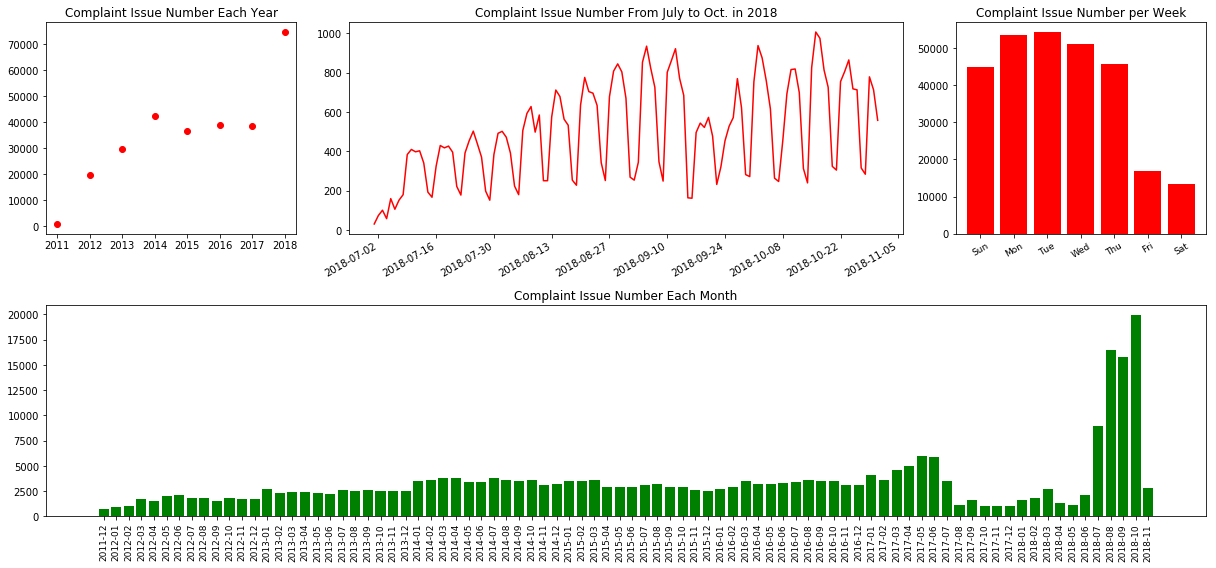

In [30]:
## 年/月/周 投诉量可视化

import matplotlib.gridspec as gridspec
import matplotlib.dates as mdate
  
fig = plt.figure(figsize=(17, 8))
gs = gridspec.GridSpec(nrows=2, ncols=4)

ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(year_rank.index.strftime('%Y'),year_rank['Count'],color='r')
ax0.set_title('Complaint Issue Number Each Year')


ax1 = fig.add_subplot(gs[0, 1:3])
ax1.plot(jul_oct_2018_rank['Date received'],jul_oct_2018_rank['Count'],'r-')
ax1.set_title('Complaint Issue Number From July to Oct. in 2018')
ax1.set_xticklabels(jul_oct_2018_rank['Date received'],rotation=30,horizontalalignment='right')
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式

ax2 = fig.add_subplot(gs[0,3])
ax2.bar(np.arange(len(week_rank)),week_rank['Count'],color='r')
ax2.set_xticks(np.arange(len(week_rank)))
ax2.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],rotation=30,size=9)             
ax2.set_title("Complaint Issue Number per Week")
               
ax3 = fig.add_subplot(gs[1,:])
ind = np.arange(len(month_rank))
ax3.bar(ind,month_rank['Count'],color='g')
ax3.set_xticks(ind)
ax3.set_xticklabels(month_rank['Date received'],rotation=90,size=9)
ax3.set_title('Complaint Issue Number Each Month')
plt.tight_layout()
plt.show()

In [32]:
## 研究产品、公司及投诉量之间的关系

prod_com = df_clean.groupby(['Product','Company'])['Issue'].count()
df_prod_com = pd.DataFrame(prod_com).reset_index().sort_values('Issue',ascending=False)
df_prod_com.head()

,Product,Company,Issue
1793,Credit reporting,"EQUIFAX, INC.",23856
1811,Credit reporting,Experian Information Solutions Inc.,22182
2309,Credit reporting,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",19540
5045,Mortgage,"BANK OF AMERICA, NATIONAL ASSOCIATION",11131
5758,Mortgage,WELLS FARGO & COMPANY,9109


In [33]:
## 获取每类产品中投诉量最多的5个公司

df_prod_com.sort_values(['Product','Issue'],ascending=[1,0],inplace=True)
grouped = df_prod_com.groupby('Product').head(5)
grouped.head()

,Product,Company,Issue
232,Bank account/service,WELLS FARGO & COMPANY,3493
19,Bank account/service,"BANK OF AMERICA, NATIONAL ASSOCIATION",3471
125,Bank account/service,JPMORGAN CHASE & CO.,2551
47,Bank account/service,"CITIBANK, N.A.",1030
223,Bank account/service,U.S. BANCORP,911


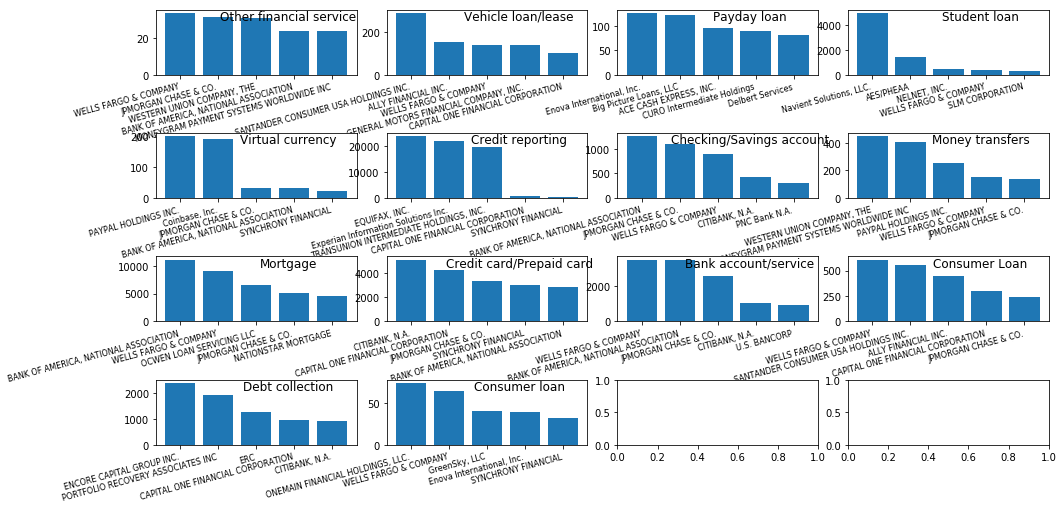

In [34]:
## 不同产品投诉量top5公司可视化

i=0
j=0
fig,axes = plt.subplots(4,4,figsize=(16,8))
for product in set(grouped['Product']):
    x = grouped[grouped['Product']==product]['Company'].values
    y = grouped[grouped['Product']==product]['Issue'].values
    axes[i//4][j].bar(x,y)
    axes[i//4][j].set_title(product,position=(0.66,0.75))
    axes[i//4][j].set_xticklabels(x,rotation=15,horizontalalignment='right',size=8)    
    i = i+1
    j = j+1
    if j>=4:
        j=0
    if i>=14:
        break
#plt.tight_layout()  
plt.subplots_adjust(wspace =0.15, hspace =0.9)
plt.show()

In [36]:
## 公司回应客户的七种状态下，投诉率前10名的投诉主题

resp_count = df_clean.groupby('Company response to consumer')['Product'].agg([('IssueTotalCount','count')])
df_resp_count = pd.DataFrame(resp_count).reset_index()
df_resp_count.head()

,Company response to consumer,IssueTotalCount
0,Closed,4085
1,Closed with explanation,213003
2,Closed with monetary relief,16040
3,Closed with non-monetary relief,35293
4,Closed with relief,1407


In [37]:
resp_issue_count = df_clean.groupby(['Company response to consumer','Issue'])['Product'].agg([('IssueCount','count')])
df_resp_issue_count = pd.DataFrame(resp_issue_count).reset_index()
df_resp_issue = df_resp_count.merge(df_resp_issue_count,on='Company response to consumer')
df_resp_issue['Percent'] = round(df_resp_issue['IssueCount'] / df_resp_issue['IssueTotalCount'] *100,2)
df_resp_issue.sort_values(['Company response to consumer','Percent'],ascending=[1,0],inplace=True)
df_resp_issue_10 = df_resp_issue.groupby(['Company response to consumer']).head(10)
df_resp_issue_10.head(11)

,Company response to consumer,IssueTotalCount,Issue,IssueCount,Percent
41,Closed,4085,"Loan modification,collection,foreclosure",717,17.55
17,Closed,4085,Cont'd attempts collect debt not owed,691,16.92
42,Closed,4085,"Loan servicing, payments, escrow account",418,10.23
28,Closed,4085,Disclosure verification of debt,335,8.20
46,Closed,4085,"Managing, opening, or closing account",298,7.29
16,Closed,4085,Communication tactics,244,5.97
27,Closed,4085,Deposits and withdrawals,171,4.19
30,Closed,4085,False statements or representation,111,2.72
36,Closed,4085,Improper contact or sharing of info,109,2.67
5,Closed,4085,"Application, originator, mortgage broker",108,2.64


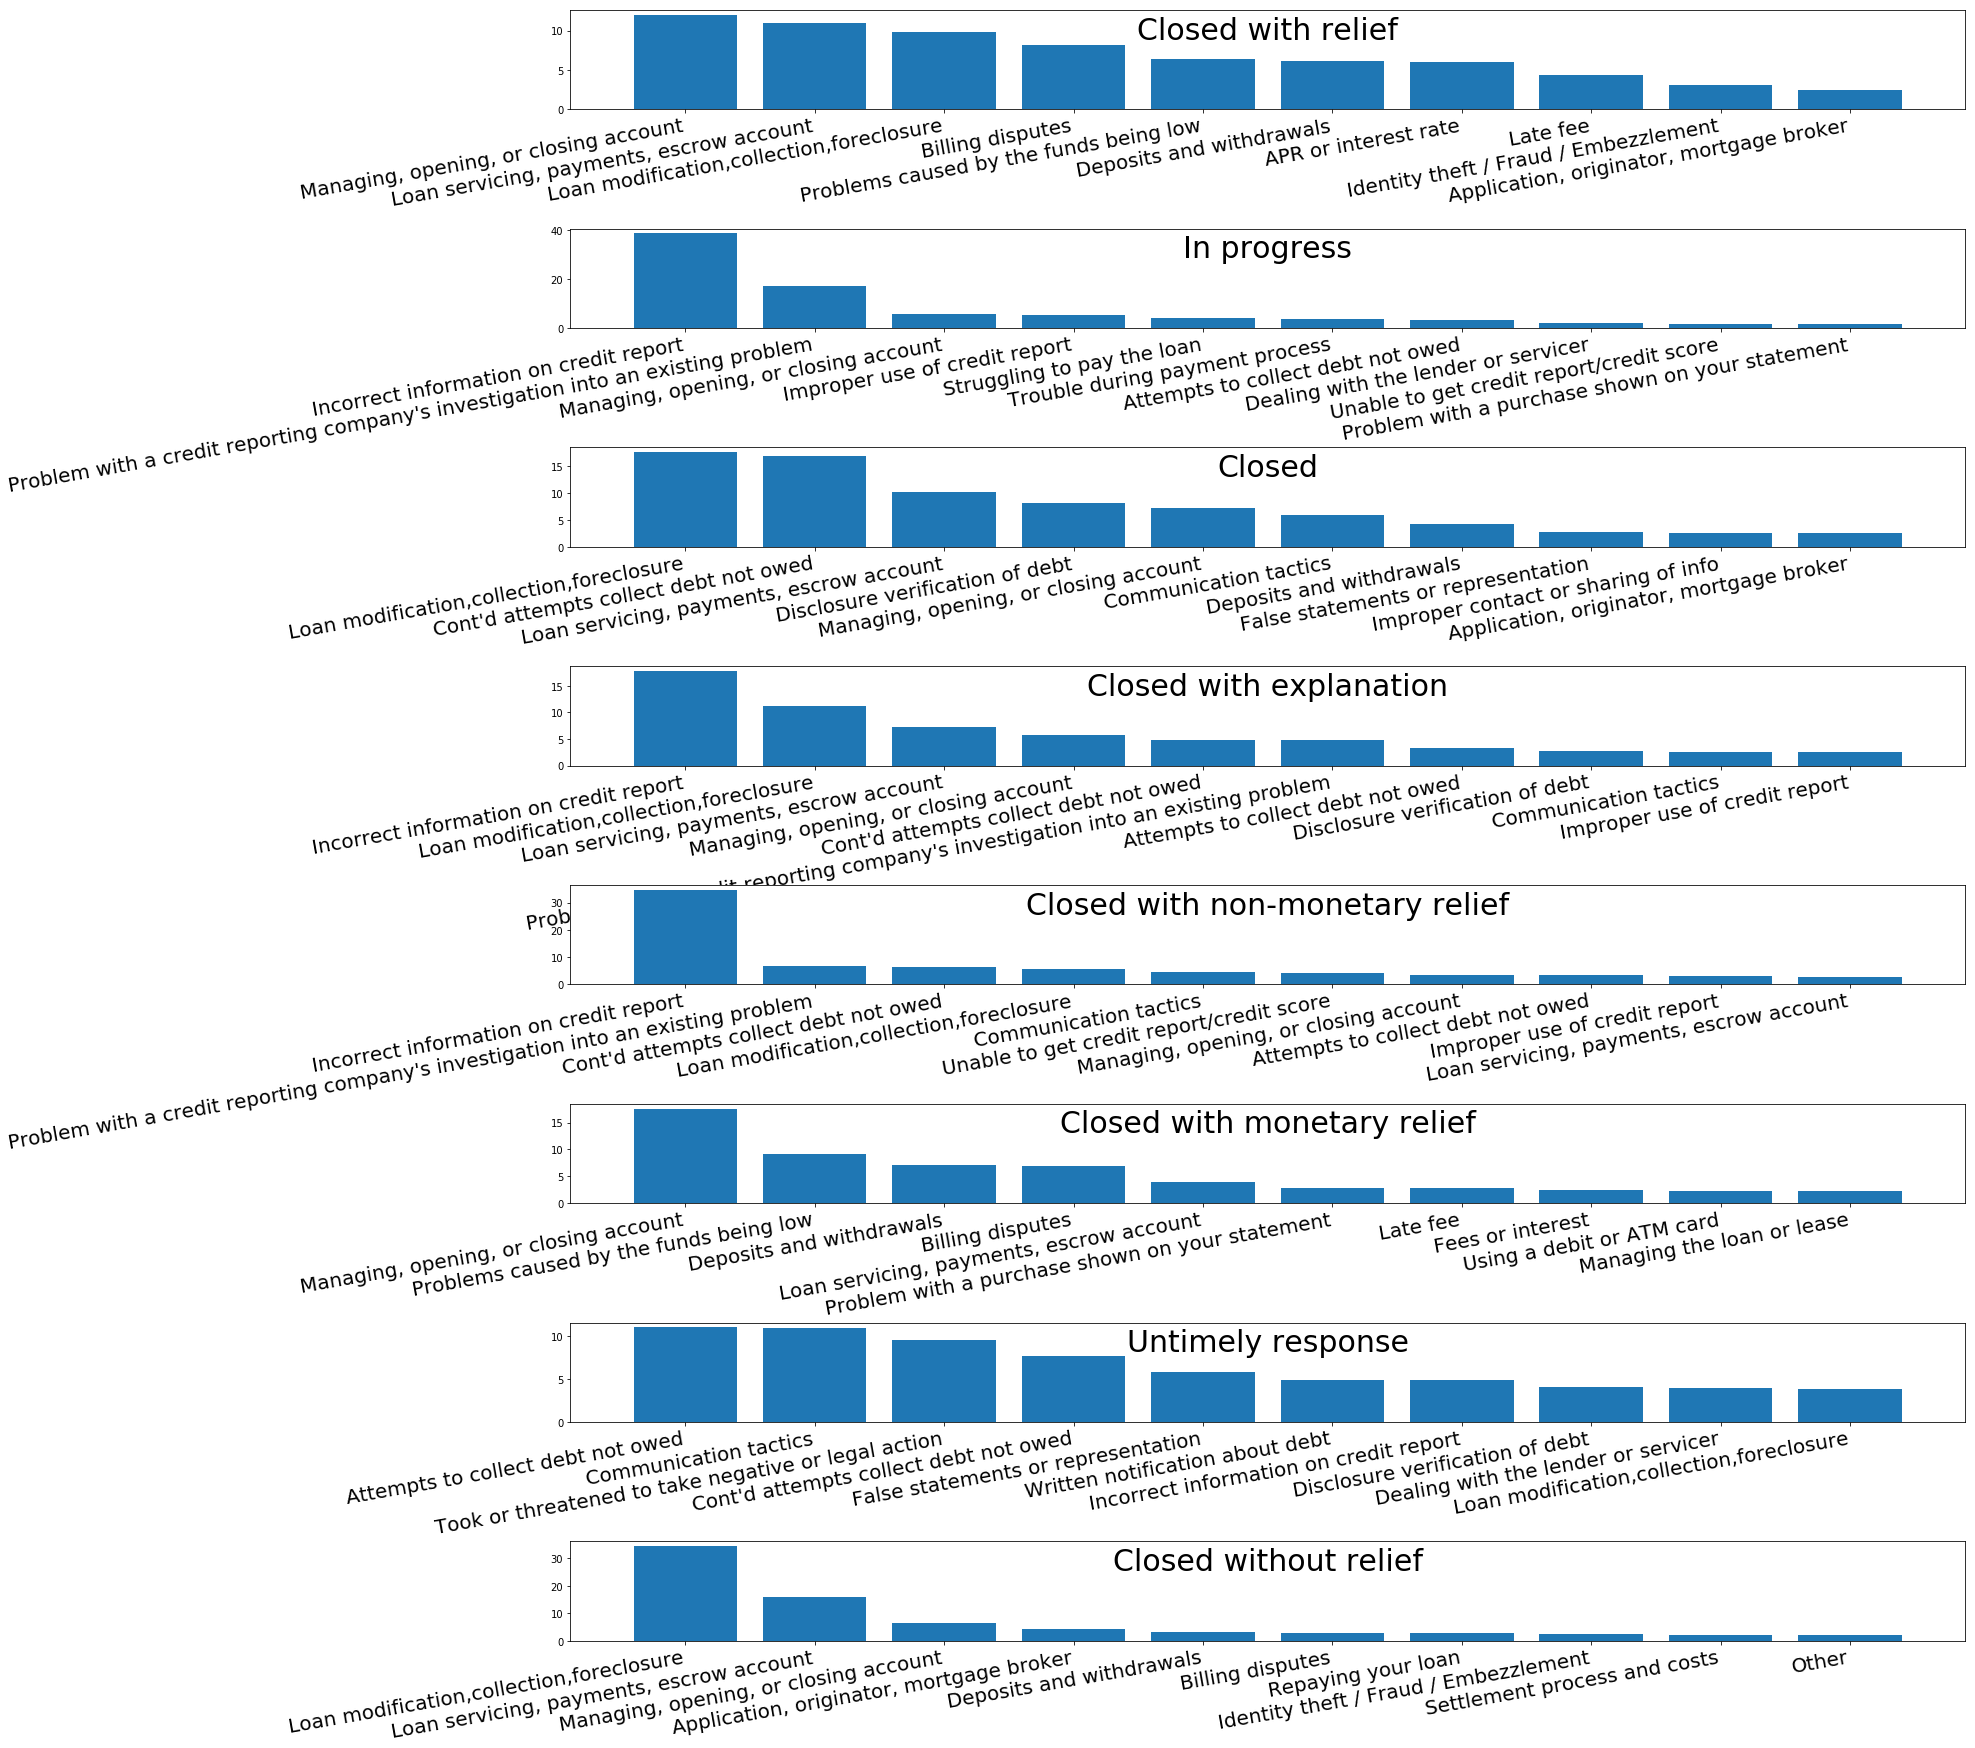

In [38]:
## 不同回应状态下投诉率前10名的投诉主题可视化

i = 0
fig,axes = plt.subplots(8,1,figsize=(25,30))
for response in set(df_resp_issue_10['Company response to consumer']):
    x = df_resp_issue_10[df_resp_issue_10['Company response to consumer']==response]['Issue'].values
    y = df_resp_issue_10[df_resp_issue_10['Company response to consumer']==response]['Percent']
    axes[i].bar(x,y)
    axes[i].set_title(response,fontsize=30,position=(0.5,0.65))
    axes[i].set_xticklabels(x,rotation=10,horizontalalignment='right',size=20) 
    i = i+1
    if i>=8:
        break
plt.subplots_adjust(hspace =1.2)
plt.show()